<a href="https://colab.research.google.com/github/runnithan03/Dissertation/blob/main/Enhancing_GLMs_with_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regularization in GLMs

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for your Logistic Regression model


# Lasso (L1) Regularization
model_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000).fit(X_train, y_train)
print(model_lasso)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')


Visualisers of the above Lasso Model

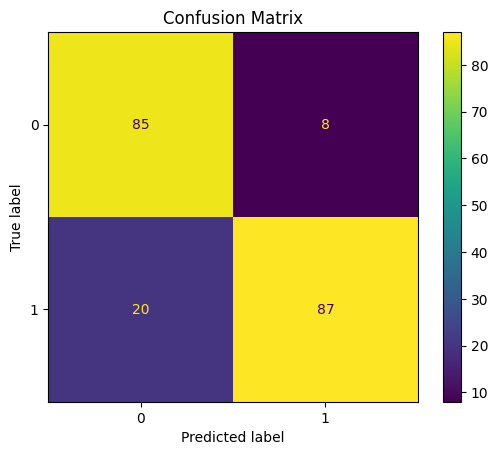

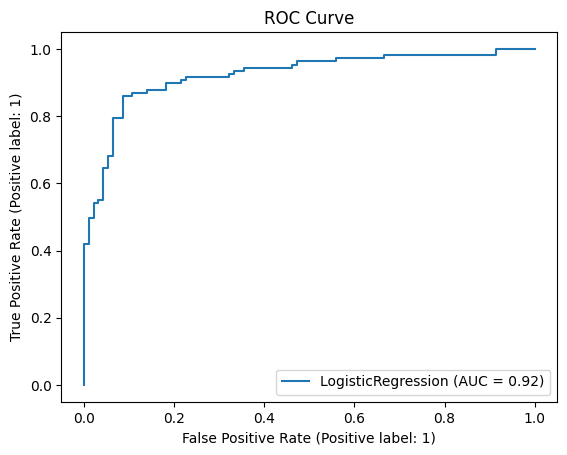

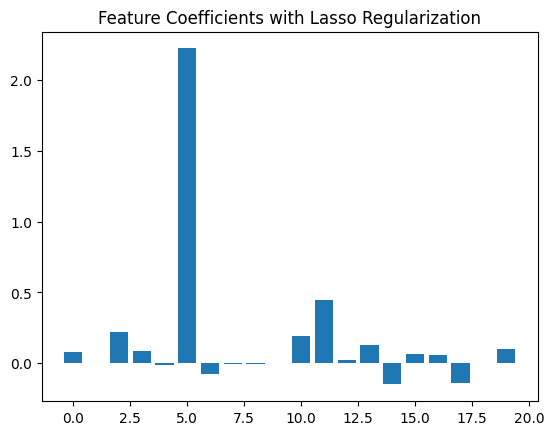

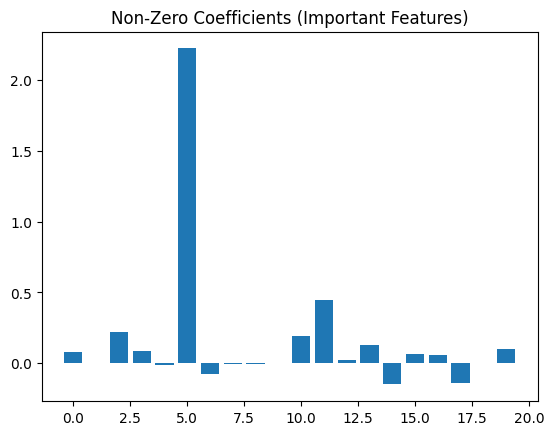

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
import numpy as np

# Predicting on the test set
y_pred = model_lasso.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 2. ROC Curve
RocCurveDisplay.from_estimator(model_lasso, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# 3. Model Coefficients (Lasso Regularization makes some coefficients zero)
coefficients = model_lasso.coef_[0]
plt.bar(range(len(coefficients)), coefficients)
plt.title("Feature Coefficients with Lasso Regularization")
plt.show()

# 4. Showing non-zero coefficients (important features)
non_zero_coefficients = np.where(coefficients != 0)[0]
plt.bar(non_zero_coefficients, coefficients[non_zero_coefficients])
plt.title("Non-Zero Coefficients (Important Features)")
plt.show()
